# Исследовательский анализ данных

**Цель работы:** изучение связи между признаками двумерного набора данных, визуализация данных.

## Описание предметной области

- Вариант №4
- Набор данных: <u>auto2.csv</u>
- Данные о подержанных авто:
1. имя
2. год
3. цена продажи
4. пройдено км
5. топливо
6. тип продавца
7. коробка передач
8. тип владельца

## 1. Чтение файла (набора данных)

Для начала практической работы, следует импортировать все необходимые библиотеки и записать `.csv` файл в датафрейм.
Также, проверим корректность загрузки данных, посмотрев первые 5 элементов набора данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("auto2.csv", sep=",")
df.head()

,Name,year,SellingPrice,kmdriven,fuel,seller_Type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


## 2. Обработка данных

### 2.1. Обработка столбцов

Стандартно просмотрим данные о наборе данных с помощью команд `info` и `describe`.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


In [3]:
df.describe()

,year,SellingPrice,kmdriven
count,4344.000000,4.342000e+03,4343.000000
mean,2013.092311,5.039987e+05,66193.063320
std,4.214543,5.784465e+05,46636.648764
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Исходя из полученных ответов команд, можно сделать вывод о том, что в наборе данных присутствуют пропуски в некоторых полях у строк.
Далее, проверим названия полей командой `columns`.

In [4]:
df.columns

Index(['Name', 'year', 'SellingPrice', 'kmdriven', 'fuel', 'seller_Type',
       'transmission', 'owner'],
      dtype='object')

Видно, что некоторые названия выглядят не совсем корректно, поэтому их следует привести к одному формату с помощью команды `rename`.

In [5]:
df = df.rename(columns={'Name': 'name',
                        'SellingPrice': 'selling_price',
                        'kmdriven': 'km_driven',
                        'seller_Type': 'seller_type'})
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### 2.2. Обработка пропусков

Проверим пропуски в таблице командой `describe` и убедимся в их наличии. Заполним пропуски нулями, т.к. это числовые поля.

In [6]:
print(df.describe(),'\n')

df['selling_price'] = df['selling_price'].fillna(0)
df['km_driven'] = df['km_driven'].fillna(0)
print(df.describe())

              year  selling_price      km_driven
count  4344.000000   4.342000e+03    4343.000000
mean   2013.092311   5.039987e+05   66193.063320
std       4.214543   5.784465e+05   46636.648764
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.100000e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000 

              year  selling_price      km_driven
count  4344.000000   4.344000e+03    4344.000000
mean   2013.092311   5.037667e+05   66177.825506
std       4.214543   5.784143e+05   46642.093059
min    1992.000000   0.000000e+00       0.000000
25%    2011.000000   2.049990e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


### 2.3. Обработка дубликатов

#### Явные дубликаты

Далее, необходимо обработать дубликаты в наборе данных. Проверим сами дубликаты и их количество с помощью команды `duplicated` и `sum`.

In [7]:
display(df[df.duplicated()])
print(f"duplicates quantity: {df.duplicated().sum()}") 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4309,Datsun GO Plus T,2017,350000.0,10171.0,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000.0,41123.0,Diesel,Dealer,Manual,First Owner
4311,Toyota Camry Hybrid 2.5,2017,1900000.0,20118.0,Petrol,Dealer,Automatic,First Owner
4340,Renault KWID RXT,2016,225000.0,40000.0,Petrol,Individual,Manual,First Owner


duplicates quantity: 763


Как видно из полученных данных, количество дубликатов составляет 763 строки, от которых, однако, придется избавиться командой `drop_duplicates` с переинициализацией индексов (`reset_index`), чтобы сохранить корректность следующего исследования и анализа набора данных.

In [8]:
df = df.drop_duplicates().reset_index()
print(f"duplicates quantity: {df.duplicated().sum()}\n") 
df.info()  # Двойная Проверка удаления дубликатов
df = df.dropna()  # Удаление объекта с NaN атрибутом 'fuel'

duplicates quantity: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3581 non-null   int64  
 1   name           3581 non-null   object 
 2   year           3581 non-null   int64  
 3   selling_price  3581 non-null   float64
 4   km_driven      3581 non-null   float64
 5   fuel           3580 non-null   object 
 6   seller_type    3581 non-null   object 
 7   transmission   3581 non-null   object 
 8   owner          3581 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 251.9+ KB


#### Неявные дубликаты

Также, проверим неявные дубликаты с помощью уникальных значений в каждом столбце (`unique`).

In [9]:
def display_implicit_duplicates():  # Инкапсулировано в функцию, чтобы применять несколько раз
    for col in df.columns:
        if col != 'index' and col != 'year' and col != 'km_driven' and col != 'selling_price':  # Выводим только информативные столбцы
            print(col, df[col].unique())

display_implicit_duplicates()

name ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel ['Petrol' 'Diesel' 'Petroll' 'CNG' 'LPG' 'Electric']
seller_type ['Individual' 'Dealer' 'Dealeer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


Результат показывает, что в таких столбцах, как 'fuel' и 'seller_type' присутствуют похожие значения, которые следует привести к одному виду. Сделать это можно командой `replace`.

In [10]:
df['fuel'] = df['fuel'].replace('Petroll', 'Petrol')
df['seller_type'] = df['seller_type'].replace('Dealeer', 'Dealer')

display_implicit_duplicates()

name ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### 2.4. Обработка типов данных

Так как значения числовых столбцов 'selling_price' и 'km_driven' не содержат после запятой никакого остатка, то их можно привести к типу `int64`.

In [11]:
df['selling_price'] = df['selling_price'].astype('int64')
df['km_driven'] = df['km_driven'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3580 non-null   int64 
 1   name           3580 non-null   object
 2   year           3580 non-null   int64 
 3   selling_price  3580 non-null   int64 
 4   km_driven      3580 non-null   int64 
 5   fuel           3580 non-null   object
 6   seller_type    3580 non-null   object
 7   transmission   3580 non-null   object
 8   owner          3580 non-null   object
dtypes: int64(4), object(5)
memory usage: 279.7+ KB


## 3. Построение графиков

### 3.1. Матрица диаграмм рассеяния

***Текст задания:***
> Построить точечную диаграмму (**матрицу диаграмм рассеяния**) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).

Для удобства, будем использовать готовый датафрейм только с числовыми столбцами (кроме 'index'). Для комплексного анализа взаимосвязей между числовыми переменными была построена матрица диаграмм рассеяния с использованием библиотеки `seaborn`. Метод `pairplot` визуализирует попарные зависимости между ключевыми метриками автомобилей: годом выпуска, ценой и пройденным расстоянием.

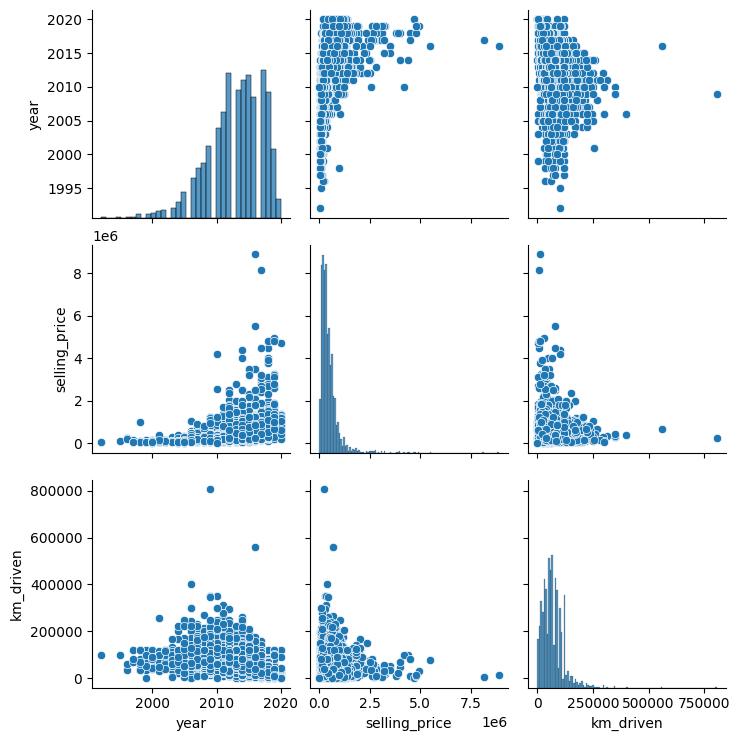

In [12]:
def is_col_int(col):  # функция проверки числового столбца (кроме index)
    return df[col].dtype == 'int64' and col != 'index'

list_int_cols = [c for c in df.columns if is_col_int(c)]  # массив числовых столбцов
count_int_cols = len(list_int_cols)  # количество числовых столбцов 

df_ints = df[list_int_cols].copy()  # копируем датафрейм с только числовыми столбцами
sns.pairplot(df[list_int_cols])

Анализ данных на графиках показывает распределение каждого признака, а также их попарные отношения.

`year` - преобладают машины, выпущенные позже остальных (2010 - 2020).

`km_driven` - большинство машин имеют относительно небольшое общее пройденное расстояние, преимущественно в интервале 0 - 125000.

`selling_price` - цена большинства машин сосредоточена в диапазоне \[0; 1\] * 100_000.

---

`year & km_driven` - общее пройденное расстояние больше у машин, выпущенных раньше (до 2010).

`year & selling_price` - более новые машины имеют большую оценочную стоимость.

`km_driven & selling_price` - чем меньше машина имеет общее пройденное расстояние, тем выше её цена.

**Диаграмма рассеяния по категориям**

Чтобы построить диаграмму рассеяния по категориям, создадим категории и их интервалы, как отдельные массивы, а также вынесем все нужные категории в отдельный датафрейм с помощью `copy`, а категорию создадим с помощью `cut`. Далее, средствами библиотеки `seaborn` строятся и оформляются гистограммы для каждой категории с распределением строк по общему пройденному расстоянию и раскрашенным цветом трансмиссии.

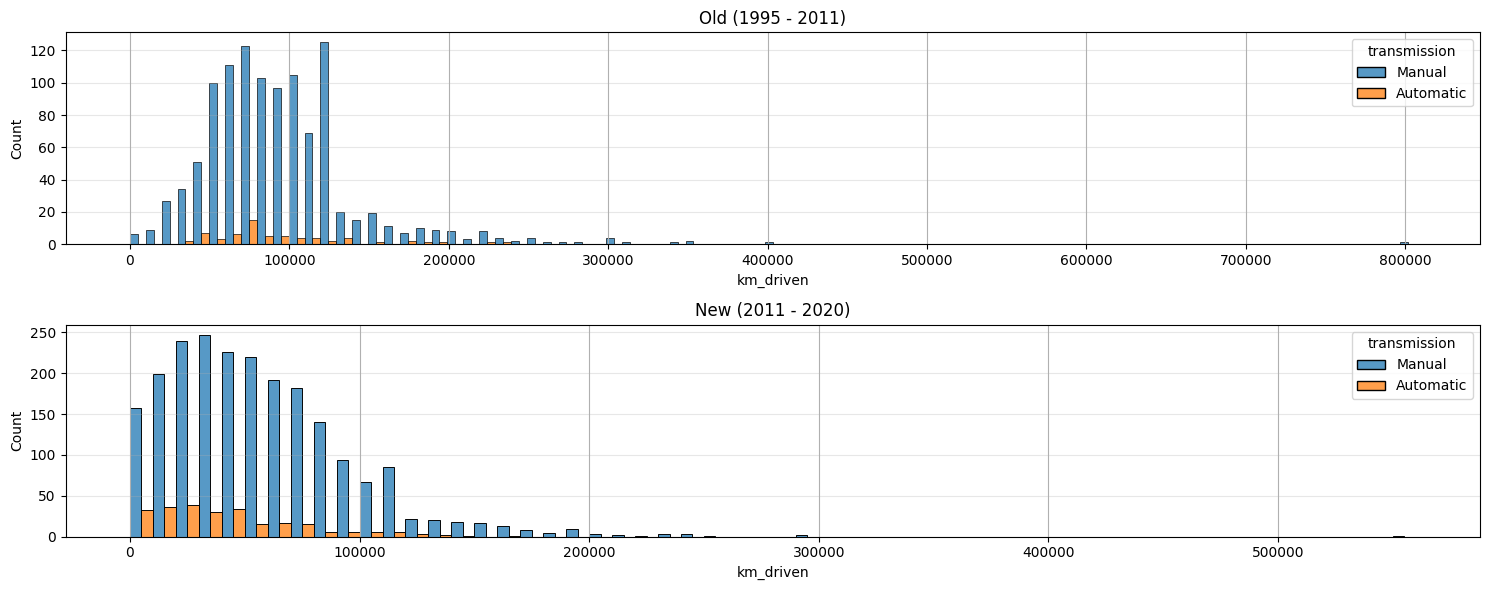

In [26]:
year_categories = ['Old', 'New']
value_year_cats = [1995, 2011, 2020]

df_year_cats = df[list_int_cols + ['transmission']].copy()
df_year_cats['year_cat'] = pd.cut(
    df_year_cats['year'],
    bins=value_year_cats,
    labels=year_categories,
    include_lowest=True
)

# Создаем отдельные гистограммы для каждой категории года
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# Гистограмма для старых автомобилей
for i in range(len(year_categories)):
    sns.histplot(data=df_year_cats[df_year_cats['year_cat'] == year_categories[i]], 
                 x='km_driven', 
                 hue='transmission', 
                 multiple='dodge',
                 ax=axes[i],
                 binwidth=10000)
    axes[i].set_title(f"{year_categories[i]} ({value_year_cats[i]} - {value_year_cats[i + 1]})")
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].grid(axis='x', alpha=1)

plt.tight_layout()
plt.show()

Выводы: Получено 2 категориальных гистограммы для соответствующих категорий годов выпуска - 'Old', 'New', также покрашенных в соответствие с типами трансмиссии. Исходя из данных, видно, что доля трансмиссий 'Automatic' заметно низкая по сравнению с 'Manual', но в категории новых машин её доля больше, чем в категории старых.

### 3.2. Построение гистограмм

Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.

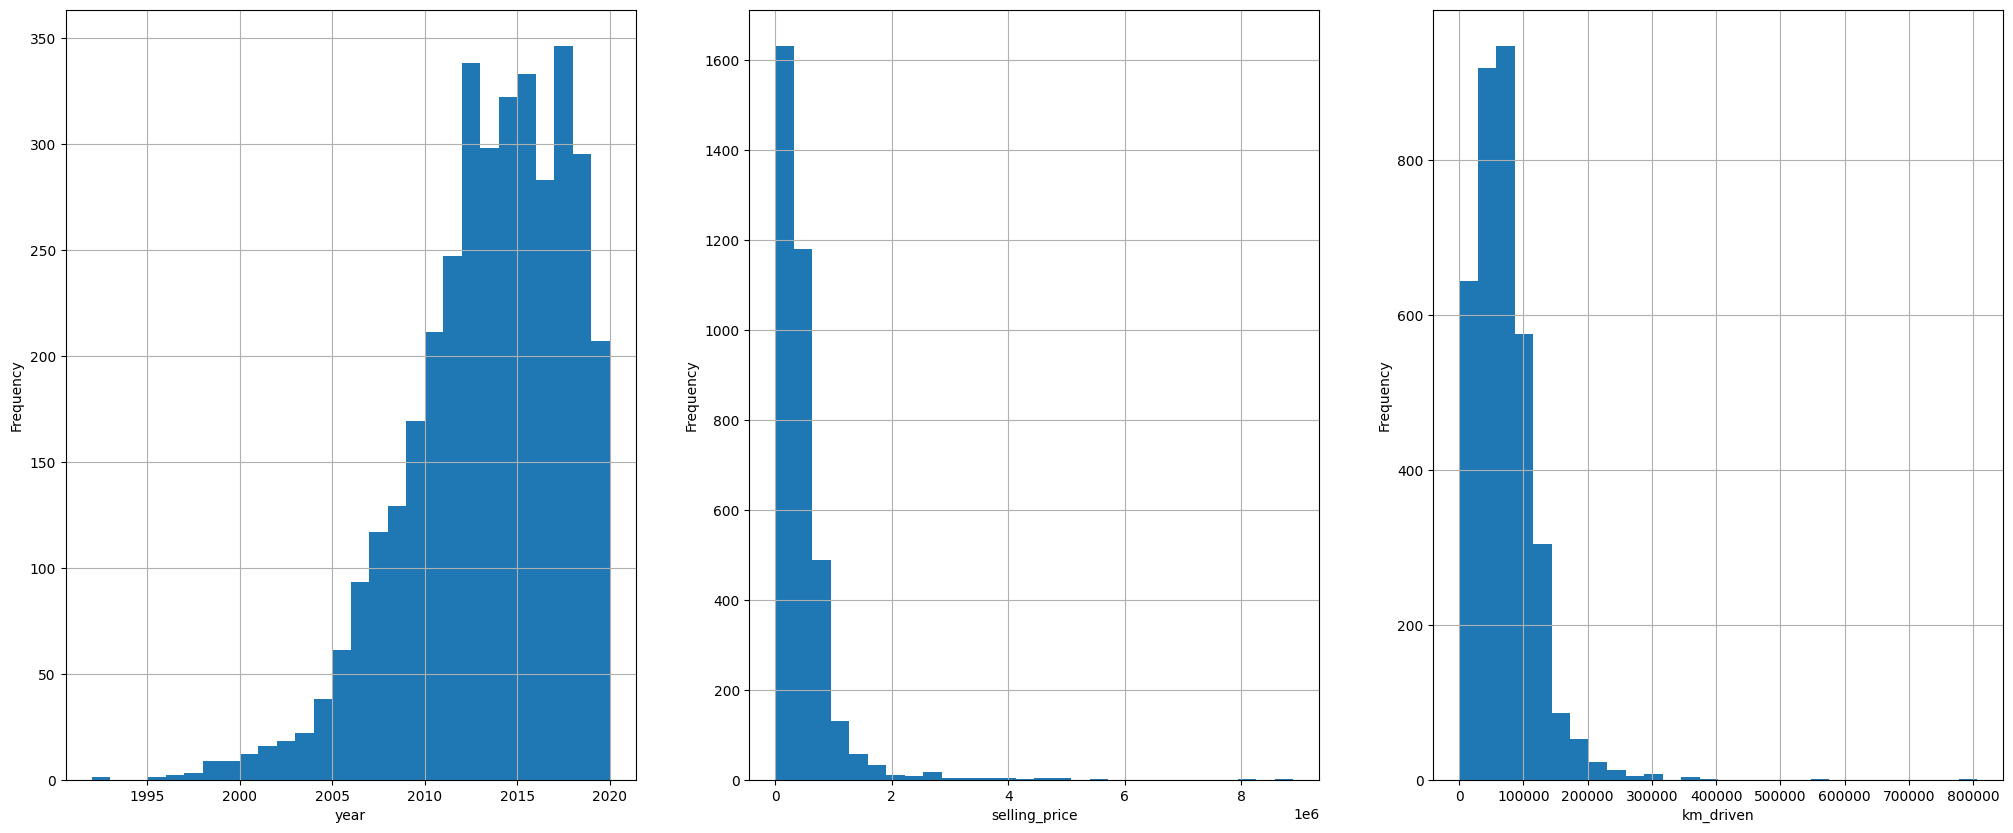

In [14]:
fig, axes = plt.subplots(
 1,  # одна строка
 count_int_cols,  # количество графиков
 figsize=(25, 10)  # размер графика
)

for col, i in zip(list_int_cols, range(count_int_cols)):  # Пробегаемся по всему списку колонок, ищем числовые (кроме index) и рисуем гистограммы только для них
    df[col].hist(bins=max(df['year']) - min(df['year']), ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

Полученные гистограммы отображают частоту встречаемых значения в каждом столбце. Таким образом, относительно каждого столбца можно заключить, что:
- распределение `year` показывает, что большинство машин прозиведено позже 2010 года;
- распределение `selling_price` показывает, что цена на машину преимущественно не повышается дальше 100_000;
- распределение `km_driven` показывает, что общее пройденное расстояние у машин сосредоточено в диапазоне \[0; 100_000\].

### 3.3. Оценка коэффициента корреляции и ковариации

***Текст задания:***
>Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить `heatmap` (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.

Для выявления взаимосвязей между числовыми показателями машин была рассчитана матрица корреляции с использованием метода `corr`. Матрица позволяет оценить степень линейной зависимости между числовыми полями: year, selling_price, km_driven.

In [15]:
df_to_corr = df[list_int_cols]  # используем ранее созданный список числовых столбцов
df_to_corr.corr()

,year,selling_price,km_driven
year,1.000000,0.424367,-0.417123
selling_price,0.424367,1.000000,-0.187026
km_driven,-0.417123,-0.187026,1.000000


Т.к. _положительная корреляция_ показывает соответственный рост показателей друг к другу, а _отрицательная_ - уменьшение одного показателя с ростом другого, можно сделать следующие заключения:

Основным фактором, влияющим на **цену**, является **год выпуска** автомобиля.

Новые автомобили (высокий `year`) имеют более высокую цену (высокий `selling_price`).

В то же время новые автомобили обычно имеют меньший пробег (низкий `km_driven`), что также положительно сказывается на цене.

Старые автомобили (низкий `year`) имеют более низкую цену (низкий `selling_price`) и, как правило, больший пробег (высокий `km_driven`), что дополнительно снижает их стоимость.


---
***Краткие теоретические сведения:***
> Если корреляция показывает линейную зависимость между двумя переменными в диапазоне \[-1; 1\], то ковариация имеет тот же математический смысл, но в собственных значениях переменных (диапазон \[$-\infty; +\infty$]).

---

Чтобы построить матрицу ковариации для числовых данных, используем тот же набор и метод `cov`.

In [16]:
display(df_to_corr.cov())  # отобразим матрицу ковариации для числовых столбцов датасета

# Чтобы убедиться, что ковариацию можно привести к корреляции, с помощью применения стандартного отклонения при расчете
std_year = df_to_corr['year'].std()  # Расчсчитываем стандартное отклонение интересующих столбцов, используя df[].std()
std_price = df_to_corr['selling_price'].std()

year_price_corr = df_to_corr.cov()['selling_price']['year'] / (std_year * std_price)  # Значение корреляции для столбцов year и selling_price
print(f"{year_price_corr:.6f}")  # Наблюдаем значение корреляции

,year,selling_price,km_driven
year,18.066215,9.184734e+05,-8.435729e+04
selling_price,918473.414541,2.592885e+11,-4.531257e+09
km_driven,-84357.286809,-4.531257e+09,2.263863e+09


0.424367


Как видно из результата, формула применена верно и полученное значение соответствует корреляции между данными переменными.

1. **Анализ дисперсий (собственная изменчивость признаков):**

`year`: Дисперсия составляет 18.07. Это относительно небольшое значение, которое указывает на то, что автомобили в выборке относятся к достаточно узкому временному периоду. Данные по этому признаку являются довольно однородными.

`selling_price`: Наблюдается чрезвычайно высокая дисперсия (2.59e+11). Это означает, что цены на автомобили в нашей выборке варьируются в огромном диапазоне. В данных, вероятно, присутствуют как очень дешевые, подержанные автомобили, так и дорогие, новые модели.

`km_driven`: Дисперсия также очень высока (2.26e+09). Это говорит о большом разбросе в пробеге: в выборке есть машины с почти нулевым пробегом и автомобили с очень большим пробегом.

Вывод: Выборка является неоднородной по ключевым параметрам 'selling_price' и 'km_driven', что необходимо учитывать при дальнейшем моделировании.

2. **Анализ ковариаций (совместная изменчивость признаков):**

`year` & `selling_price`: Ковариация положительная и составляет 918_473. Это подтверждает ожидаемую логическую связь: чем новее автомобиль, тем выше его цена. Рост одного признака сопровождается ростом другого.

`year` & `km_driven`: Ковариация отрицательная (-84_357). Наблюдается обратная зависимость: чем новее автомобиль, тем меньше у него пробег.

`selling_price` & `km_driven`: Ковариация отрицательная и имеет большое абсолютное значение (-4.53e+09). Это указывает на сильную обратную связь: автомобили с большим пробегом имеют тенденцию к более низкой цене.

Далее, построим `heatmap` (тепловую карту корреляции) используя средства библиотеки `seaborn`.

<Axes: >

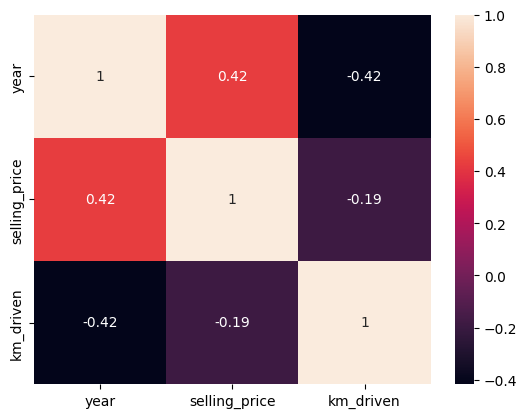

In [17]:
sns.heatmap(df_to_corr.corr(), annot=True)

**Выводы:** Тепловая карта показывает то же, что и матрица корреляции, только еще с добавлением цветовой окраски соответственных значения корреляции (тёмный - **отрицательная**, светлый - **положительная**).

## 4. Выполнение заданий

### 4.1. Задание 1

Использовать `seaborn`. По группировке - _'owner'_ и количество машин каждого типа коробки передач (_'transmission'_) построить диаграмму следующего вида: [task_1](../../../jupyter/lab2/task1.jpg)

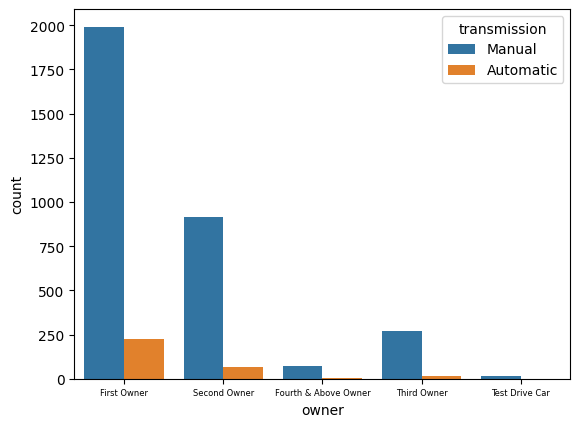

In [18]:
sns.countplot(x="owner", hue="transmission", data=df)
plt.xticks(fontsize=6)
plt.show()

**Выводы:** на данной гистограмме отображается соответствие между количеством элементов (машин), каждой категории владельца (_'owner'_), относительно атрибута типа трансмиссии (_'transmission'_). Автоматический счетчик производится с помощью `sns.countplot`, `plt` используется для работы с текстом, чтобы правильно организовать подписи объектов по оси абсцисс. 

### 4.2. Задание 2

Использовать `pandas` и `plot`. Отфильтровать набор данных и выбрать год выше 2005. По сводной таблице (pivot_table) - отобразить среднее количество пройденных километров (km_driven) по годам. Оставить только маркеры в виде ★ розового цвета размером 20. [task_2](../../../jupyter/lab2/task2.jpg)

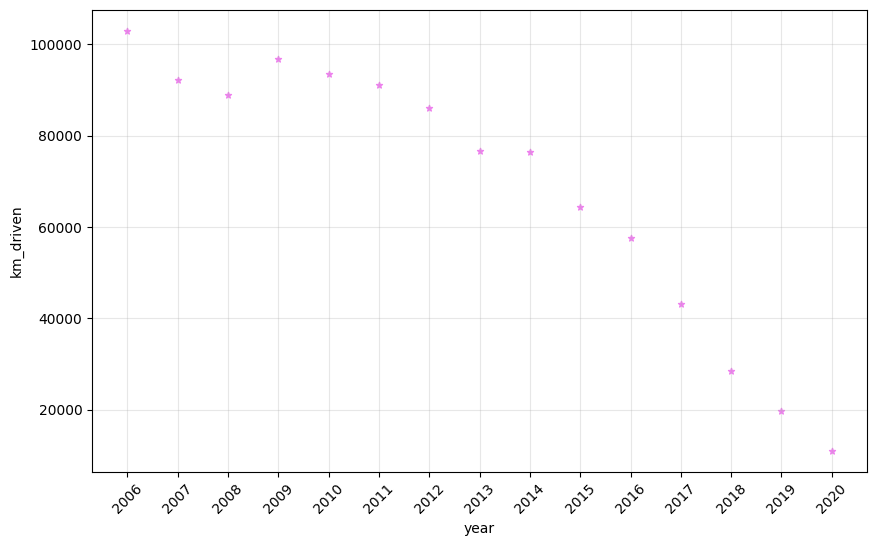

In [19]:
km_year_pivot = df[df['year'] > 2005].pivot_table(index='year', values='km_driven').reset_index()
km_year_pivot.plot(kind='scatter', x='year', y='km_driven', marker='*', color='violet', figsize=(10, 6))

plt.xlabel('year')
plt.ylabel('km_driven')
plt.grid(True, alpha=0.3)
plt.xticks(km_year_pivot['year'], rotation=45)
plt.show()

**Выводы:**

1. _Диапазон пробега:_

- Максимальные пробеги достигают 100_000 км
- Минимальные значения находятся в районе 0 - 20_000 км
- Наблюдается значительный разброс значений пробега для каждого года

2. _Распределение по годам:_

- Данные охватывают период с 2006 по 2020 год

3. _Зависимость пробега от года выпуска:_

- Автомобили 2006 - 2010 годов: демонстрируют широкий разброс пробегов от низких до максимальных значений (до 100_000 км)
- Автомобили 2011 - 2015 годов: показывают средние значения пробега с концентрацией в диапазоне 20_000 - 60_000 км
- Автомобили 2016 - 2020 годов: преимущественно имеют низкие пробеги (0 - 40_000 км)

### 4.3. Задание 3

Использовать `matplotlib`. Построить круговую диаграмму, которая отображает процент каждого типа топлива (fuel). Можно убрать из диаграммы тип топлива, который встречается всего 1 раз. [task_3](../../../jupyter/lab2/task3.jpg)

Для более красивого отображения можно использовать `textprops={'size': 'x-large'}` и `legend(fontsize = 18, bbox_to_anchor=(1, 1))` и размер фигуры 20 на 8.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fuel    4 non-null      object
 1   count   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


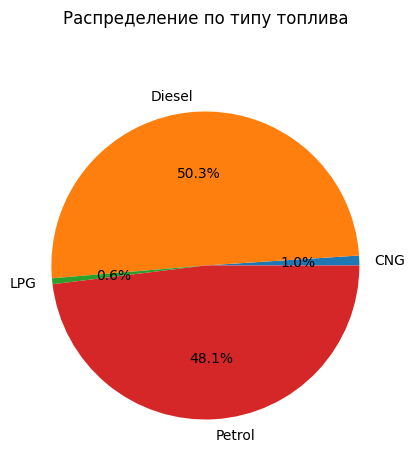

In [29]:
fig, ax = plt.subplots(figsize = (12, 5))

fuel_df = df[df['fuel'] != 'Electric']  # вычитаем из набора единственную строку с типом топлива Electric, чтобы нормально отображать данные
fuel_count = fuel_df.groupby('fuel')['index'].count().reset_index().rename(columns={'index': 'count'})
fuel_count.info()

ax.pie(fuel_count['count'], labels=fuel_count['fuel'], autopct="%.1f%%")
ax.set_title("Распределение по типу топлива\n\n")
plt.show()

**Выводы:**

1. Доминирование двух основных типов топлива:

- Дизель (Diesel): 50.3% - занимает половину рынка
- Бензин (Petrol): 48.1% - практически сравнялся с дизелем
- Вместе эти два типа составляют 98.4% рынка

2. Маргинальная доля альтернативных видов топлива:

- СУГ (LPG): 1.0% - минимальное присутствие
- КПГ (CNG): 0.6% - наименьшая доля на рынке
- Суммарно альтернативные виды топлива занимают всего 1.6%

### 4.4. Доп. задание

Построить диаграмму, как в задании 1, но поменять 'owner' -> 'year'.

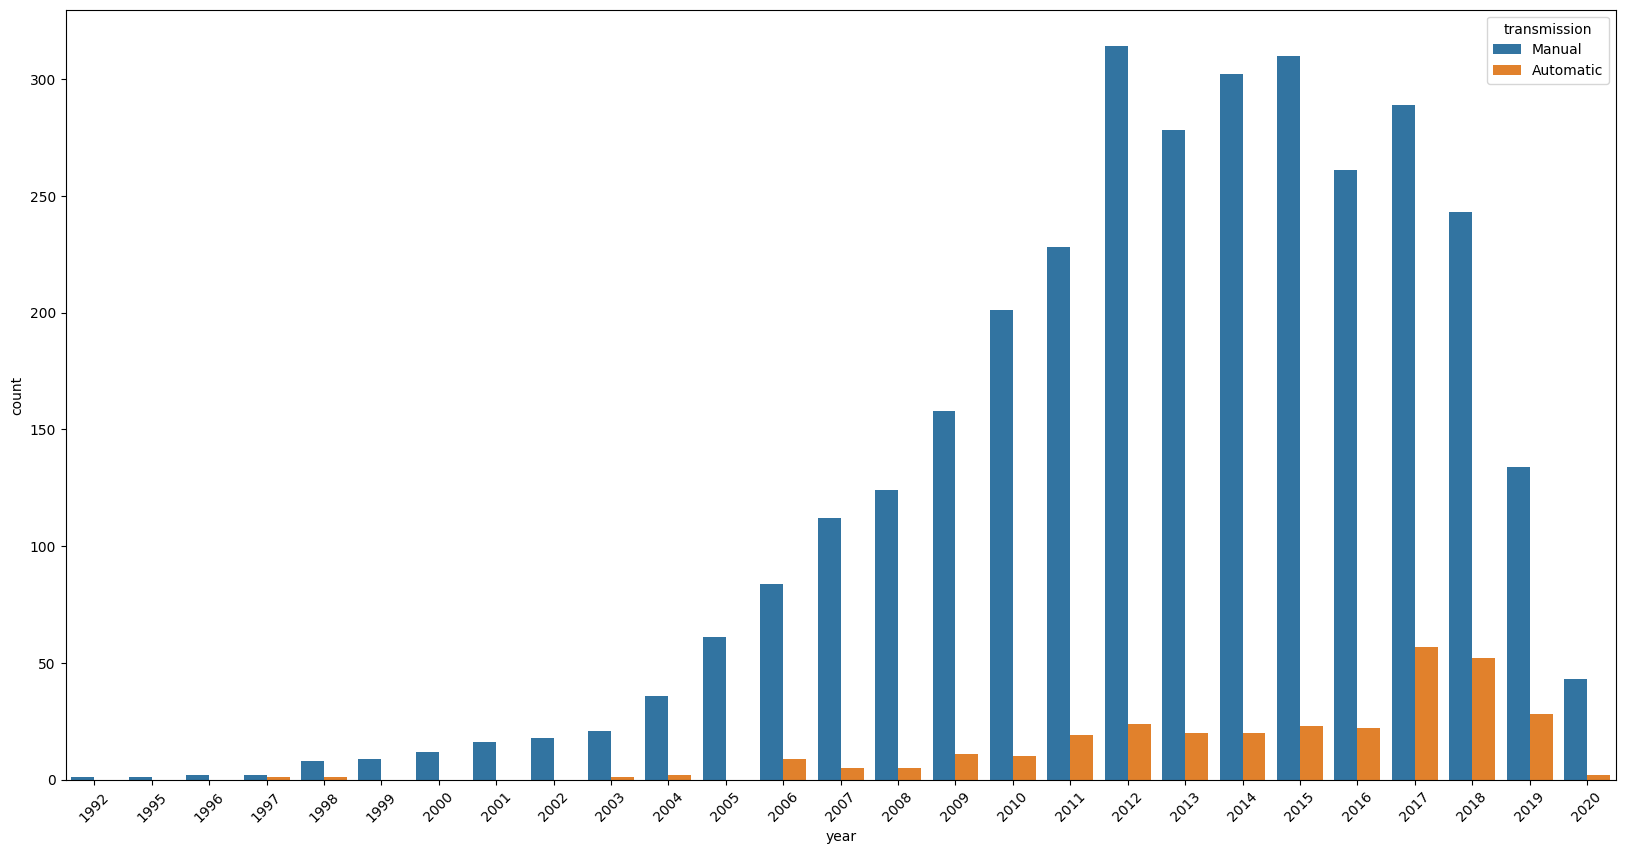

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(x="year", hue="transmission", data=df)
plt.xticks(rotation=45)
plt.show()

**Выводы:** Из результирующей гистограммы по категориям трансмиссии наблюдается плавный рост количества машин до 2012 г., после чего видно преимущественное количество автомобилей 2012 - 2017 гг. с типом транcмиссии 'Manual'. При этом больше всего машин с типом трансмиссии 'Automatic' находится в 2017 - 2018 гг. Однако виден резкий спад количества машин и почти нулевое количество машин с типом 'Automatic' в 2019 - 2020 гг.

## 5. Выполнение графиков

### 5.1. Выполнение графика типа `hexagonal binning plot`

Выполните минимум один любой график типа `hexagonal binning plot`. Сделайте выводы.

<Axes: xlabel='selling_price', ylabel='year'>

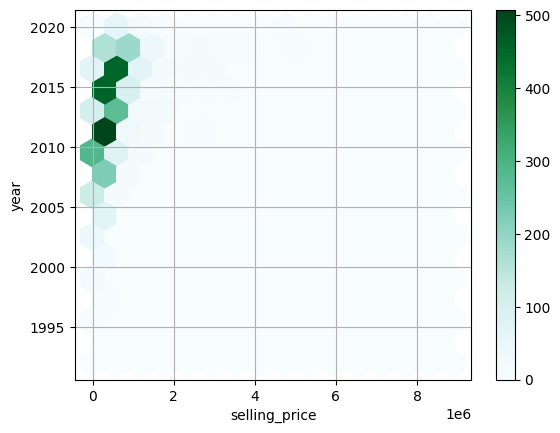

In [22]:
df.plot(x='selling_price', y='year', kind='hexbin', gridsize=15, grid=True)

В ходе анализа взаимосвязи между годом выпуска автомобиля и его ценой был построен график `hexagonal binning plot`.

**На основании анализа графика можно сделать следующие выводы:**

_Четко прослеживается прямая зависимость:_ Чем новее автомобиль, тем выше его цена продажи. Это очевидная и ожидаемая тенденция, которая явно подтверждается данными.

_Наблюдается эффект "старения":_ Автомобили с возрастом теряют в стоимости. При этом видно, что в первые годы после выпуска цена падает относительно плавно, но с течением времени этот процесс может усугубляться.

_Существует "порог" старости:_ Особенно резкое падение стоимости наблюдается у автомобилей, выпущенных примерно до 2005 - 2010 г. Автомобили старше этого возраста имеют крайне низкую рыночную стоимость, близкую к нулю, что может говорить о их полном моральном и физическом устаревании.

Таким образом, год выпуска является одним из ключевых факторов, определяющих стоимость подержанного автомобиля, причем зависимость носит нелинейный характер, и цена резко снижается после определенного возраста.

### 5.2. Выполнение графика типа `boxplot`

***Текст задания:***
> Выполните минимум один график типа `boxplot` для любого столбца. Сделайте выводы.

---

_Краткие теоретические сведения:_
> Диаграмма размаха позволяет быстро оценить основные характеристики распределения и выявить наличие выбросов или аномалий. **«Ящик»** на диаграмме ограничен Q1 и Q3, а внутри ящика показывается **медиана**. «Усы» на диаграмме равны 1,5 межквартильного размаха, в них попадают нормальные значения, а за их пределами показаны **выбросы**, которые представляют собой точки. **Выбросы** – это нетипичные наблюдения. «Усы» могут совпадать с минимальным и максимальным значением в данных, например, если «ус» длиннее максимума, то он завершается максимумом.

---

Для построения графика `boxplot` следует выбрать числовой столбец (например 'selling_price'), и использовать его в методе `plt.boxplot` (также, следует установить `vert=False`, чтобы график был горизонтальным).

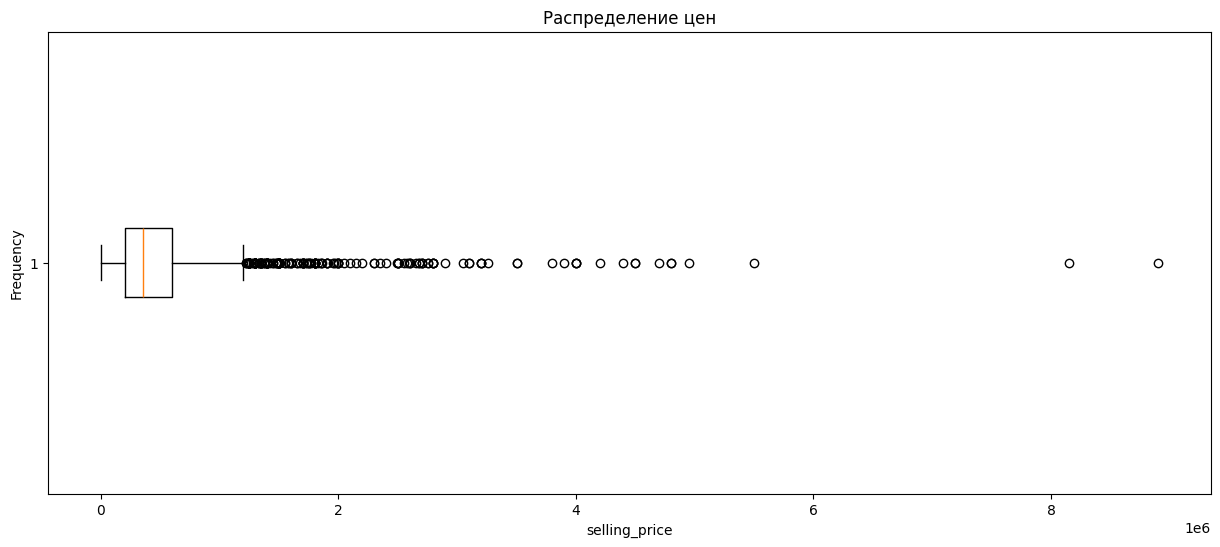

In [23]:
plt.figure(figsize=(15, 6))
plt.boxplot(df['selling_price'], vert=False)
plt.title('Распределение цен')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()

**Выводы:**
Относительно данного `boxplot` можно сказать, что основные значения сосредоточены в диапазоне \[0; 1_600_000\]. Медианой является значение 350_000, как и показано в методе `describe`. Наблюдается очень много выбросов - большинство находится около значения 200_000.

### 5.3. Добавление категории по числовому столбцу

***Текст задания:***
>Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте `boxplot` по этому числовому столбцу по каждой новой категории (на `boxplot` будет box-ы для средней, низкой и высокой зарплаты).

Добавим категории к столбцу стоимости машины 'selling_price' - 'Low', 'Middle', 'High'. Для категоризации используем `pd.cut`, где разобьем на категории относительно Q1, медианы и max-значения. Построим `boxplot` при помощи `sns.boxplot`.

Границы категорий были определены статистически с помощью метода `describe`, но также приведены нормализованные значения, при которых график выглядит более компактным, содержит меньше выбросов и заметен более плавный рост распределений по категориям.

,year,selling_price,km_driven,price_category
0,2007,60000,70000,Low
1,2007,135000,50000,Low
2,2012,600000,100000,Low
3,2017,250000,46000,Low
4,2014,450000,141000,Low
...,...,...,...,...
3575,2014,409999,80000,Low
3576,2009,110000,83000,Low
3577,2016,865000,90000,Low
3578,2016,225000,40000,Low


Text(0, 0.5, 'price_category')

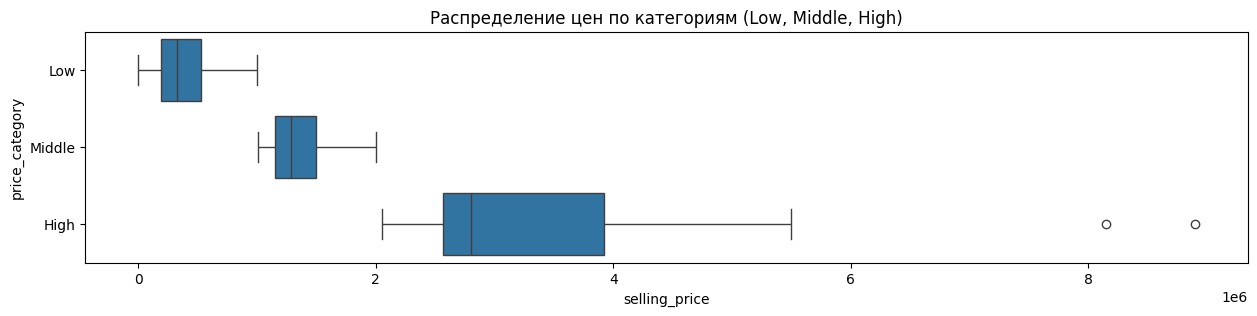

In [24]:
price_categories = ['Low', 'Middle', 'High']  # Сами категории
value_price_cats = [0, 210_000, 600_000, 8_900_000]  # Значения категорий (их границы), являющиеся Q1, медианой и max соответственно
normal_value_price_cats = [0, 1_000_000, 2_000_000, 8_900_000]  # Нормализованные значения категоризации, с меньшим кол-вом выбросов и компактным распределением

df_price_cat = df_ints.copy()  # Используем новый датафрейм только с числовыми значениями
df_price_cat['price_category'] = pd.cut(  # Категоризация
    df_price_cat['selling_price'],  # Столбец для категоризации
    bins=normal_value_price_cats,  # Границы категорий
    labels=price_categories,  # Названия категорий
    include_lowest=True  # Включаем 0 в категорию Low
)
display(df_price_cat)  # Проверка нового датафрейма

count_cats = len(price_categories)
plt.figure(figsize=(count_cats * 5, count_cats))
sns.boxplot(data=df_price_cat, y='price_category', x='selling_price', orient='h')
plt.title('Распределение цен по категориям (Low, Middle, High)')
plt.xlabel('selling_price')
plt.ylabel('price_category')

**Выводы:**

При использовании **статистических значения** категоризации наблюдается много выбросов в категории 'High', а также в целом большое распределение в данной категории и очень маленькие распределения в других категориях.

Если использовать **нормализованные значения**, то распределения становятся более явными, наблюдается плавный рост по категориям. Кол-во выбросов заметно уменьшается.

В обоих случаях, можно утверждать, что очень большое кол-во машин имеют высокое значение стоимости в диапазоне \[2; 4\] * 1_000_000 ед.

### 5.4. Выполнение графиков `boxplot` по категориям

***Текст задания:***
>Выполните ещё минимум 2 графика `boxplot` по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

Остается еще 2 числовых столбца - 'year', 'km_driven', которые можно обработать. Для столбца 'year' выберем две категории (например 'Old', 'New'), а для столбца 'km_driven' рассмотрим 4 категории. Используем те же методы: `pd.cut` - для категоризации, `sns.boxplot` - для графика `boxplot`.

Границы категорий для годов выпуска машин определены по медиане.

Границы категорий для пройденного расстояния были определены иначе, из-за сильного разброса для высоких значения данного поля. Поэтому, распределяем категории по медиане, $max/4$, $max/2$ и $max$ соответственно.

,year,selling_price,km_driven,year_category
0,2007,60000,70000,Old
1,2007,135000,50000,Old
2,2012,600000,100000,New
3,2017,250000,46000,New
4,2014,450000,141000,New
...,...,...,...,...
3575,2014,409999,80000,New
3576,2009,110000,83000,Old
3577,2016,865000,90000,New
3578,2016,225000,40000,New


,year,selling_price,km_driven,year_category,km_category
0,2007,60000,70000,Old,Low
1,2007,135000,50000,Old,Very low
2,2012,600000,100000,New,Low
3,2017,250000,46000,New,Very low
4,2014,450000,141000,New,Low
...,...,...,...,...,...
3575,2014,409999,80000,New,Low
3576,2009,110000,83000,Old,Low
3577,2016,865000,90000,New,Low
3578,2016,225000,40000,New,Very low


Text(0, 0.5, 'km_category')

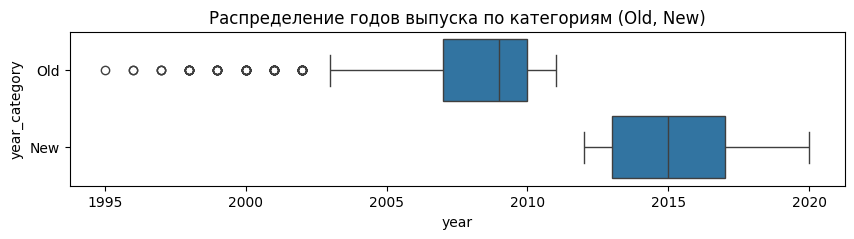

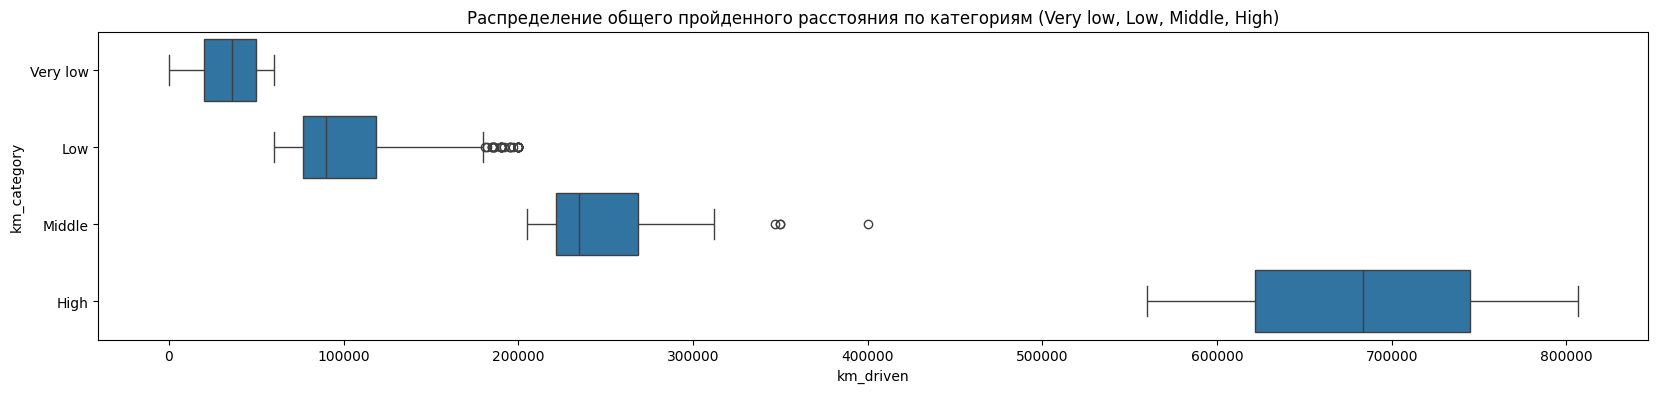

In [25]:
# Категории годов выпуска берем из ранее созданного массива [Old, New]
km_categories = ['Very low', 'Low', 'Middle', 'High']  # Категории общего пройденного расстояния машины

# Добавляем категории в новый датафрейм
df_cats = df_ints.copy()
df_cats['year_category'] = pd.cut(
    df_cats['year'],
    bins=value_year_cats,  # [1995, 2011, 2020]
    labels=year_categories,
    include_lowest=True
)
display(df_cats)

df_cats['km_category'] = pd.cut(
    df_cats['km_driven'],
    bins=[0, 60000, 200000, 400000, 806599],
    labels=km_categories,
    include_lowest=True
)
display(df_cats)

# Строим boxplot графики
count_year_cats = len(year_categories)
count_km_cats = len(km_categories)
plt.figure(figsize=(count_year_cats * 5, count_year_cats))
sns.boxplot(data=df_cats, y='year_category', x='year', orient='h')
plt.title('Распределение годов выпуска по категориям (Old, New)')
plt.xlabel('year')
plt.ylabel('year_category')

plt.figure(figsize=(count_km_cats * 5, count_km_cats))
sns.boxplot(data=df_cats, y='km_category', x='km_driven', orient='h')
plt.title('Распределение общего пройденного расстояния по категориям (Very low, Low, Middle, High)')
plt.xlabel('km_driven')
plt.ylabel('km_category')

На основе представленных `boxplot` графиков можно сделать следующие выводы:

***По распределению годов выпуска (year_category):***
1. **Четкое разделение категорий**
- Категории 'Old' и 'New' хорошо разделены с минимальным перекрытием
- 'Old' автомобили: 1995 - 2011 годы (медиана 2009);
- 'New' автомобили: 2012 - 2020 годы (медиана 2015);

2. **Особенности распределения**
- 'New' категория: Более узкий разброс и симметричное распределение;
- 'Old' категория: Широкий разброс, что указывает на большую неоднородность старых автомобилей (особенно много выбросов около значени 2000);
- Наблюдаются небольшие выбросы в категории 'Old'.

---

***По распределению пробега (km_category):***
1. **Прогрессивное увеличение пробега**
- Четкая прогрессия от 'Very low' к 'High'.
- Каждая следующая категория имеет более высокие значения пробега.

2. **Особенности каждой категории**
- 'Very low': 0 - 60_000 км, очень компактное распределение (медиана 30_000);
- 'Low': 60_000 - 200_000 км, заметное увеличение разброса, наблюдаются выбросы (медиана 90_000);
- 'Middle': 200_000 - 400_000 км, примерно такой же диапазон, как и предыдущий по размеру, выбросов меньше (медиана 230_000);
- 'High': 400_000+ км, самый широкий разброс (медиана 680_000).

3. **Наличие выбросов**
- В категории 'Low' наблюдается много выбросов, в категории 'Middle' есть немного выбросов.
- Это указывает на автомобили с очень высоким пробегом даже для своих категорий.

## Выводы:

В ходе лабораторной работы проанализирован набор данных о поддержанных автомобилях. В структуре набора выявлено преобладание строк с высокими значениями цен (> 2_000_000), поздним годом выпуска (> 2010) и средними значениями пробега (~60_000). Распределение ключевых числовых показателей отображает правостороннюю ассиметрию, что указывает на наличие преимущественно дорогих, но новых машин. Анализ взаимосвязей с помощью корреляции показывает умеренную положительную взаимосвязь показателей `year & selling_price` и умеренную отрицательную - `year & km_driven`, что указывает на то, что более новые машины стоят дороже и имеют меньший пробег (вполне логично).

Освоена работа с графическими возможностями построения диаграмм и графиков с помощью библиотек `seaborn`, `matplotlib.pyplot` и `pandas`. Проведена работа с такими видами графиков, как - гистограммы, матрицы рассеивания, `heatmap`, `boxplot`, `hexagonal binning plot`.